In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/insurance.csv")


In [3]:
print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


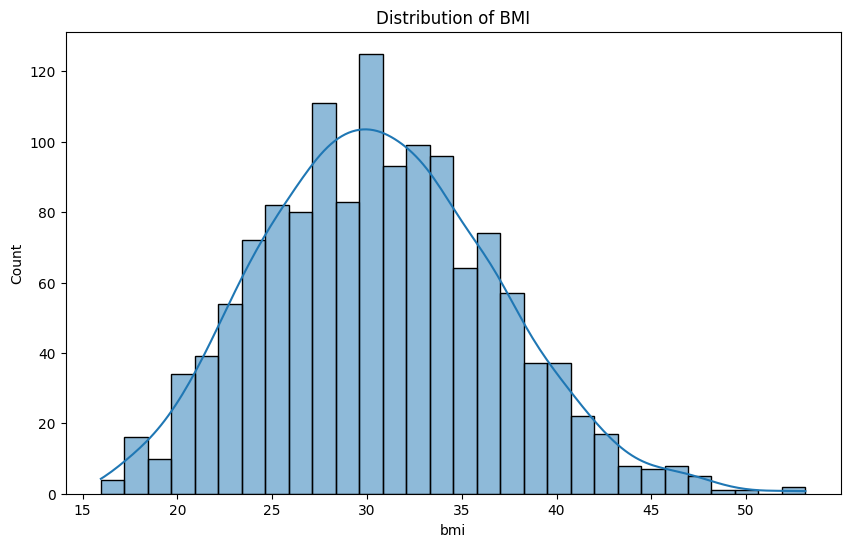

In [4]:
# Examine the distribution of Bmi
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()

# When I look at the bmi ranges I saw the : Below 18.5 :	Underweight
#                                           18.5 – 24.9 :	Healthy Weight
#                                           25.0 – 29.9 :	Overweight
#                                           30.0 and Above : Obesity
# So in this dataset Healthy Weight peoples are less than Overweight
# and Obesity peoples. So we can assume that there is a problem with eating habits.

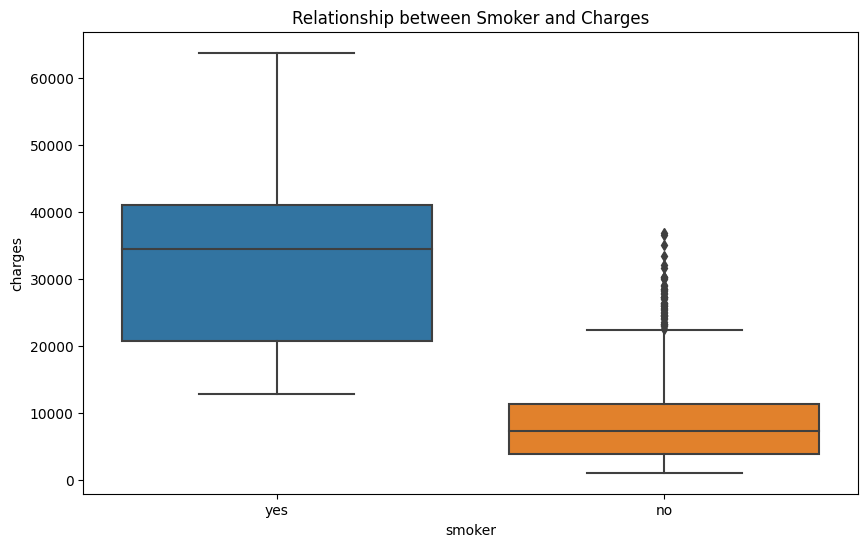

In [5]:
# Examine the relationship between “smoker” and “charges”
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Relationship between Smoker and Charges')
plt.show()

# As it is clearly seen in the figure, the expenditures of smokers are at
# least twice as high as those of non-smokers.

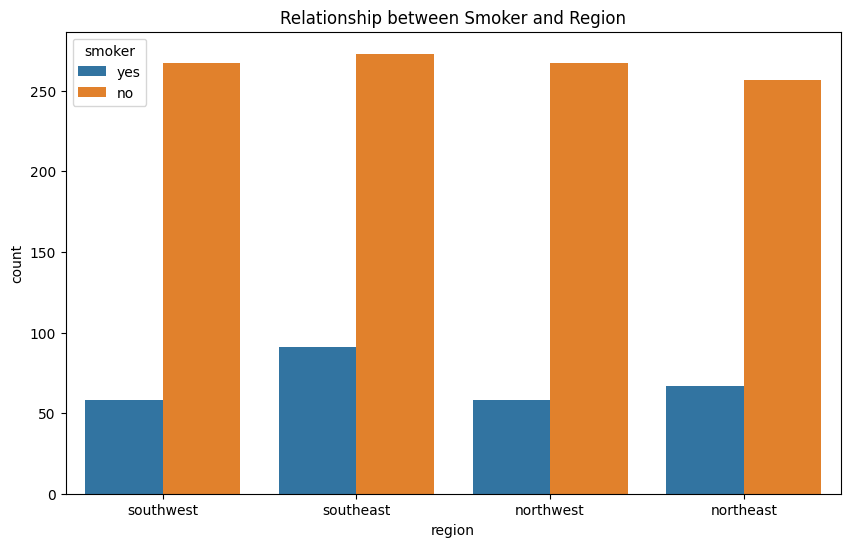

In [6]:
# Examine the relationship between “smoker” and “region”
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='smoker')
plt.title('Relationship between Smoker and Region')
plt.show()

# There is no relationship between Smoker and Region. As you can see
# in the figure smokers always less then non-smokers

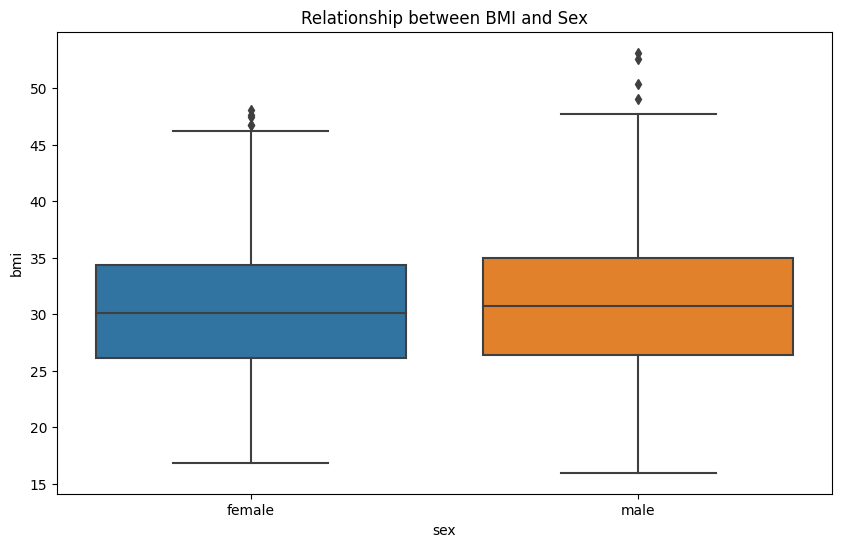

In [7]:
# Examine the relationship between “bmi” and “sex”
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='bmi')
plt.title('Relationship between BMI and Sex')
plt.show()

# There are no relationship between BMI and Sex


In [9]:
# Find the "region" with the most "children"
most_children_region = df.groupby('region')['children'].sum().idxmax()
print('Region with most children:', most_children_region)

# Region with most children: South East


Region with most children: southeast


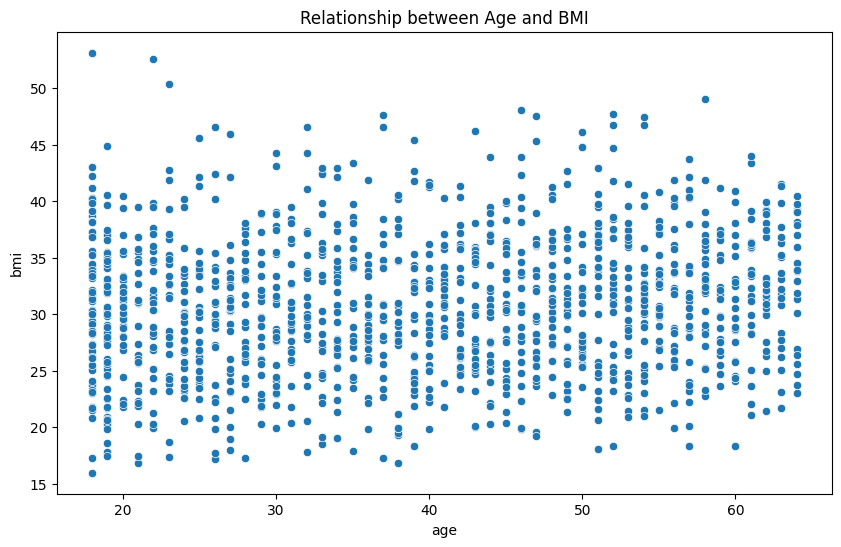

In [10]:
# Examine the relationship between “age” and “bmi”
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='bmi')
plt.title('Relationship between Age and BMI')
plt.show()



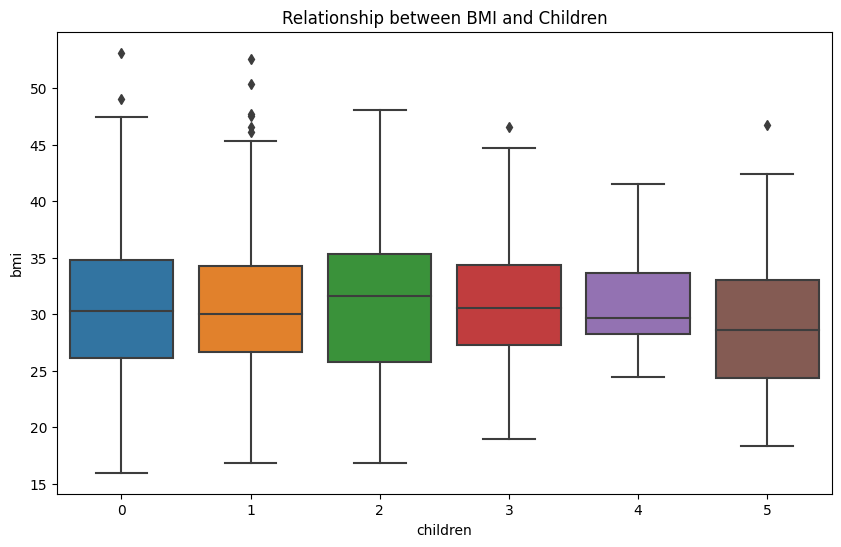

In [11]:
# Examine the relationship between “bmi” and “children”
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='children', y='bmi')
plt.title('Relationship between BMI and Children')
plt.show()



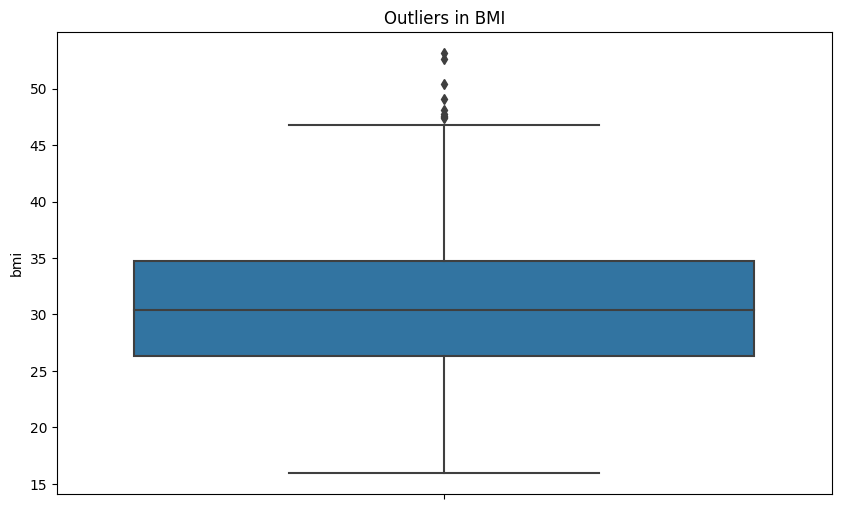

In [12]:
# Is there an outlier in the "bmi" variable? Please review.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='bmi')
plt.title('Outliers in BMI')
plt.show()

# Yes ,There are outlier variables in BMI. As you can see in this figure dots
#  above the line at the top of the figure are outliers.

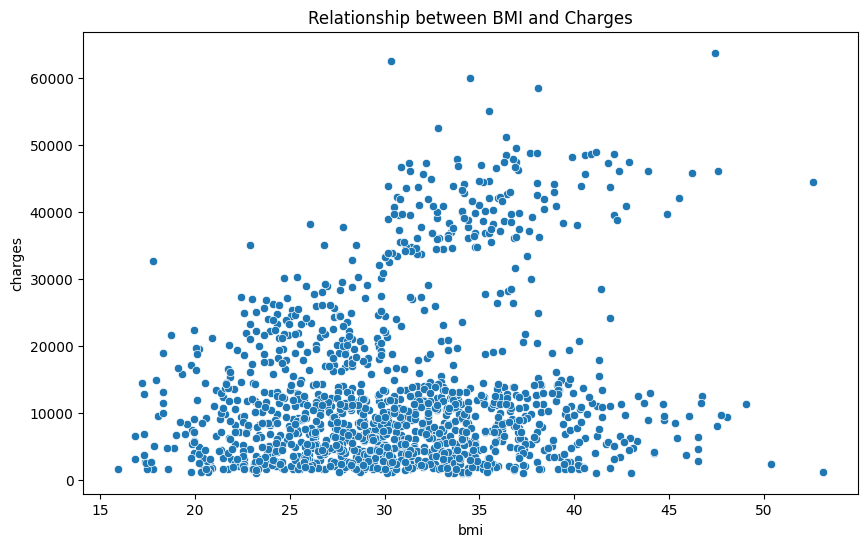

In [13]:
# Examine the relationship between “bmi” and “charges”
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title('Relationship between BMI and Charges')
plt.show()



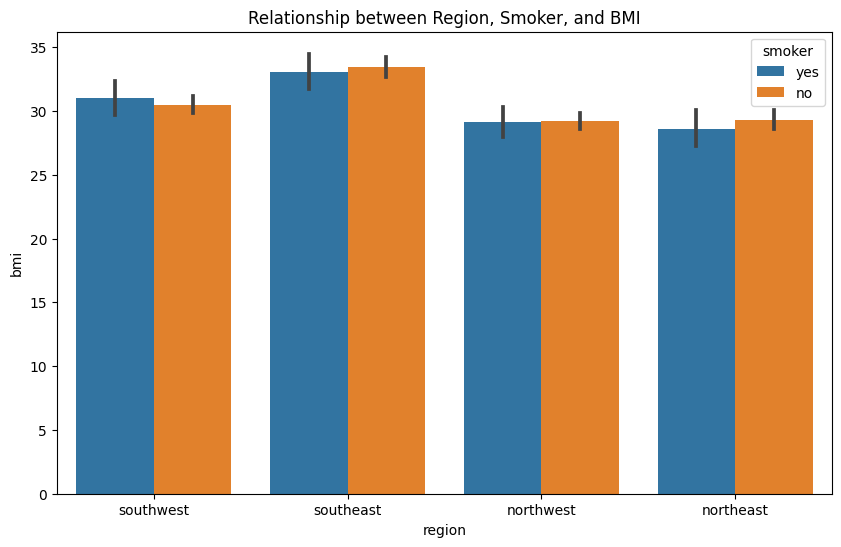

In [14]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='region', y='bmi', hue='smoker')
plt.title('Relationship between Region, Smoker, and BMI')
plt.show()

# The figure below didn't give us any information because they all look simila

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [16]:
# Separate features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Apply Label Encoding to 'sex', 'smoker', and 'region'
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])
X['smoker'] = label_encoder.fit_transform(X['smoker'])
X['region'] = label_encoder.fit_transform(X['region'])

# Apply One-Hot Encoding to 'region' column
X = pd.get_dummies(X, columns=['region'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the dataset using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [21]:
models = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42)
]

# Train and evaluate models using cross-validation
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = (-scores)**0.5  # Convert negative RMSE to positive
    avg_rmse = rmse_scores.mean()
    print(f"{model.__class__.__name__}: Average RMSE = {avg_rmse:.2f}")

# Choose the best performing model.
best_model = min(models, key=lambda model: cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error').mean())
print("Best performing model:", best_model.__class__.__name__)

LinearRegression: Average RMSE = 6147.09
RandomForestRegressor: Average RMSE = 4952.82
GradientBoostingRegressor: Average RMSE = 4701.80
Best performing model: LinearRegression


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Grid Search with the GradientBoostingRegressor and parameter grid
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)
print("Best model:", best_model)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best model: GradientBoostingRegressor(learning_rate=0.01, n_estimators=300, random_state=42)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions using the optimized model
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 19591873.300824985
Mean Absolute Error: 2641.497315527465
R-squared: 0.8738033276499709
